# How to train your Keypoint Moseq Model:
Ok... so you are going to have to bare with me because this tutorial involves ***a lot*** of jumping back and forth. 

### There are a few steps to training the Keypoint Moseq Model:
#### 1. Calibration and PCA (JupyterLab)
- Essentially you have to set it up so the Keypoint Moseq model can know how accurate the SLEAP model is
- The calibration part is interactive you will have to do that in Jupyterlab
- You will also set up your kappa for step **2. Fitting AR-HMM Model**, which is just the distribution of syllable lengths. Higher kappa, longer syllables. 
#### 2. Fitting AR-HMM Model (notebook or Python Script on HPC)
- AR-HMM: Autoreggressive Hidden Markov Model (no, I don't know what that is)
- This step can also take awhile so you can also run this model fitting as a script on the HPC. I include it in the notebook because when I tried it in a notebook, it didn't crash my kernel like step **3. Fitting a Full Model** did and for me, it's easier to keep track of the order of things in a Jupyter Notebook.
#### 3. Fitting a Full Model (Python Script on HPC)
- This is the Jupyter kernel killer step so you have to run it as a script on the HPC. I will include the name and order of which scripts to run once you get to this point in the notebook. Don't worry, Mommy is going to hold your hand.

#### First you need to import your Keypoint Moseq package:
Since you need to do step **1. Calibration and PCA** in JupyterLab anyways you might as well start running this code there. To open Ju

In [1]:
import keypoint_moseq as kpms
import os

c:\Users\Steve\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:20: UserWarning:

Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.



#### and also set up filepaths:

In [11]:
video_dir = r'Y:\Karin\tutorialmaking\morekatiesvideosmodeling\keypointmoseqwork\videos' #change directory of output folder here for the videos and h5 files
sleap_model_path = 'C:/Users/Steve/Desktop/Karin/tutorials/240709_092906.multi_instance.n=1301/' #where is your SLEAP model?
project_dir = r'Y:\Karin\tutorialmaking\morekatiesvideosmodeling\keypointmoseqwork'
data_dir = video_dir

#### aaand set up your config

In [4]:
config = lambda: kpms.load_config(project_dir)

In [5]:
bodyparts=[
'nose',
'earL',
'earR',
'head',
'centroid',
'tailBase',
'tailEnd',
'upperBack',
'lowerBack',
'lateralL',
'lateralR',]

skeleton=[
    ['nose', 'earL'],
    ['nose', 'earR'],
    ['nose', 'head'],
    ['nose', 'lateralL'],
    ['nose', 'lateralR'],
    ['head', 'upperBack'],
    ['upperBack', 'lowerBack'],
    ['lowerBack', 'tailBase'],
    ['tailBase', 'tailEnd']
    ]
kpms.setup_project(
    project_dir,
    video_dir=video_dir,
    bodyparts=bodyparts,
    skeleton=skeleton,
    overwrite=True)

In [2]:
kpms.update_config(
    project_dir,
    video_dir=video_dir,
    anterior_bodyparts=['nose'],
    posterior_bodyparts=['tailBase'],
    use_bodyparts=[
   'nose','earL', 'earR','head','centroid','tailBase','upperBack','lowerBack','lateralL','lateralR'])

NameError: name 'kpms' is not defined

#### Now load your coordinate data.
I wrote this code so it will open .h5 files, though you can change the code so it can use .slp data. If you want to use DeepLabCuts output, you will have to change the code also, but I don't feel like going in to instructions for DeepLabCuts-Keypoint Moseq work so just look at the [Keypoint Moseq Colab notebook](https://colab.research.google.com/github/dattalab/keypoint-moseq/blob/main/docs/keypoint_moseq_colab.ipynb) from the developers for reference if you really want (also you can look for reference if you want to get rid of the "only being able to use .h5 files" part of my code)

In [9]:
# Ensure 'videos' directory within data_dir
keypoint_data_path = os.path.join(project_dir, 'videos')

# Load only files ending with .h5
h5_files = [f for f in os.listdir(keypoint_data_path) if f.endswith('.h5')]

# Assuming kpms.load_keypoints and kpms.format_data are functions provided by a library
coordinates, confidences, bodyparts = kpms.load_keypoints([os.path.join(keypoint_data_path, f) for f in h5_files], 'sleap')

# format data for modeling
data, metadata = kpms.format_data(coordinates, confidences, **config())

Loading keypoints: 100%|████████████████| 38/38 [00:01<00:00, 20.66it/s]
c:\Users\Steve\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\util.py:836: UserWarning:


Coordinates for the following bodyparts are missing (set to NaN) in at least 50.0% of frames:
 - tailEnd



c:\Users\Steve\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\util.py:842: UserWarning:

This may cause problems during modeling. See https://keypoint-moseq.readthedocs.io/en/latest/FAQs.html#high-proportion-of-nans for additional information.



# 1. Calibration and PCA (JupyterLab)
So you should be in JupyterLab, if you are not, open this notebook in JupyterLab. You need JupyterLab to calibrate the SLEAP model with Keypoint Moseq interactively.
So taken directly from the [Keypoint Moseq Colab notebook](https://colab.research.google.com/github/dattalab/keypoint-moseq/blob/main/docs/keypoint_moseq_colab.ipynb) from the developers, here are the calibration instructions:

##### Run the cell below. A widget should appear with a video frame on the left.
##### Annotate each frame with the correct location of the labeled bodypart
- ##### Left click to specify the correct location - an “X” should appear.
- ##### Use the arrow buttons to annotate additional frames.
- ##### Each annotation adds a point to the right-hand scatter plot.
- ##### Continue until the regression line stabilizes.
##### At any point, adjust the confidence threshold by clicking on the scatter plot.
##### Use the “save” button to update the config and store your annotations to disk.

In [ ]:
kpms.noise_calibration(project_dir, coordinates, confidences, **config())

#### Fit the PCA
You will also have to fit a PCA to your calibration data:

>=90.0% of variance exlained by 2 components.


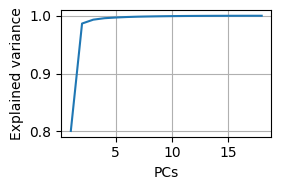

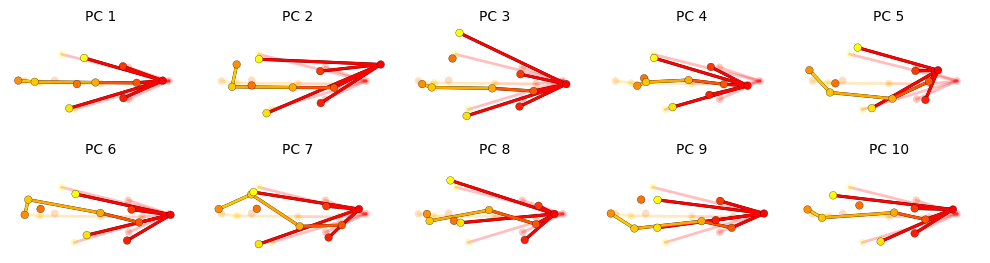

In [10]:
pca = kpms.fit_pca(**data, **config())
kpms.save_pca(pca, project_dir)

kpms.print_dims_to_explain_variance(pca, 0.9)
kpms.plot_scree(pca, project_dir=project_dir)
kpms.plot_pcs(pca, project_dir=project_dir, **config())


##### Change your ```latent_dim``` to however many dimensions are needed to explain 90% of the variance (take from previous cell output) or 10 dimensions, whichever is lower:

In [11]:
kpms.update_config(project_dir, latent_dim=2) #CHANGE HERE

# 2. Fitting AR-HMM Model (notebook or Python Script on HPC)
This step can take a while so it may be better to run the `arhmmfit.py` script from the repository on the HPC. This will save a model and in the future, you will use the name of the folder (which should be named a date like `2024_07_12-11_12_32` for example) as the `kpmsmodel_name`

#### Set up initialize the model and set up `kappa` hyperparameter for the AR-HMM

In [ ]:
# use the following to load an already fit model
# pca = kpms.load_pca(project_dir)

# initialize the model
model = kpms.init_model(data, pca=pca, **config())

# optionally modify kappa
model = kpms.update_hypparams(model, kappa=1e7)

#### Fit your AR-HMM model

In [ ]:
num_ar_iters = 50

model, kpmsmodel_name = kpms.fit_model(
    model, data, metadata, project_dir,
    ar_only=True, num_iters=num_ar_iters)

# 3. Fitting a Full Model (Python Script on HPC)

You will have to use the `kpmsmodelfit.py` and `kpmsreindexandsave.py` scripts in order to fit a full model. In this script, you can just fill in the filepaths and you should be good. To run this script you must have HPC access. You have to change the `.py` file in `job.sh` to whichever script you need to run and i ran the script by submiting a job with `qsub job.sh` on to the HPC. You might need to write your own `job.sh` file. This may take some troubleshooting. 

The `kpmsmodelfit.py` will fit your full Keypoint Moseq model and `kpmsreindexandsave.py` will reindex your syllables by frequency and save them as `results.h5`. You can also adjust the `kappa` for the full model. 


#### Once you have a Keypoint Moseq Model you can check here to see what the median frame durations are for every 25 iterations, just put the foldername of the keypoint moseq model of interest in the next cell.

In [8]:
kpmsmodel_name = '2024_07_27-13_41_35arhmm1e3' #CHANGE HERE

In [12]:
import os
import keypoint_moseq as kpms
import h5py
import numpy as np

checkpoint_path = os.path.join(project_dir, kpmsmodel_name, "checkpoint" + ".h5")

with h5py.File(checkpoint_path, "r") as f:
    saved_iterations = np.sort([int(i) for i in f["model_snapshots"]])
    mask = f["data/mask"][()]

median_durations = []
for i in saved_iterations:
    with h5py.File(checkpoint_path, "r") as f:
        z = np.array(f[f"model_snapshots/{i}/states/z"])
        median_durations.append(np.median(kpms.get_durations(z, mask)))

print(median_durations)

[262.0, 5.0, 5.0, 9.0, 10.0, 10.0, 11.0, 11.0, 13.0, 15.0, 15.0, 15.0, 16.0, 16.0, 17.0, 17.0, 18.0, 18.0, 17.0, 17.0, 18.0, 18.0, 17.0]
